# Throughput test

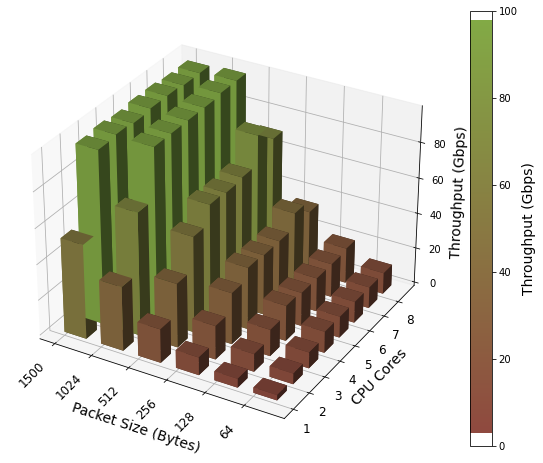

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.cm as cm

# Data Setup
categories = ['1500', '1024', '512', '256', '128', '64']
triggers = [1, 2, 3, 4, 5, 6, 7, 8]
values = np.array([
    [53, 36, 19, 10, 5, 3],    # 1
    [97, 69, 36, 19, 10, 6],   # 2
    [98, 97, 54, 29, 15, 9],   # 3
    [97, 97, 64, 35, 20, 12],  # 4
    [98, 97, 63, 34, 19, 12],  # 5
    [98, 97, 64, 34, 19, 12],  # 6
    [97, 98, 80, 42, 19, 12],  # 7
    [97, 98, 71, 35, 20, 12]   # 8
    # 1500, 1024, 512, 256, 128, 64
])

# Meshgrid for 3D plotting
xpos, ypos = np.meshgrid(np.arange(len(categories)), np.arange(len(triggers)))
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = dy = 0.6  # Bar width
dz = values.flatten()

from matplotlib.colors import LinearSegmentedColormap

# Create Figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Define two hex colors: Red (#FF0000) for low, Green (#00FF00) for high
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["#8F493F", "#82AA45"])

# Normalize values and apply colormap
colors = custom_cmap(dz / np.max(dz))

norm = Normalize(vmin=np.min(dz), vmax=np.max(dz))

# Add color bar
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap=custom_cmap), ax=ax)
cbar.set_label("Throughput (Gbps)", fontsize=14)
cbar.set_ticks([0, 20, 40, 60, 80, 100])  # Ensure 0 and 100 are included
cbar.set_ticklabels(["0", "20", "40", "60", "80", "100"])  # Set labels explicitly
# Plot Bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=colors, shade=True)

# Labels and Titles
ax.set_xticks(np.arange(len(categories)))
ax.set_xticklabels(categories, rotation=45, fontsize=12, ha="right")
ax.set_yticks(np.arange(len(triggers)))
ax.set_yticklabels(triggers, fontsize=12)
ax.set_xlabel("Packet Size (Bytes)", fontsize=14, labelpad=15)
ax.set_ylabel("CPU Cores", fontsize=14)
ax.set_zlabel("Throughput (Gbps)", fontsize=14)
# Save BEFORE showing
plt.savefig("throughput_ouput.pdf", format="pdf", bbox_inches="tight")

# Show the figure
plt.show()

# Dataset description

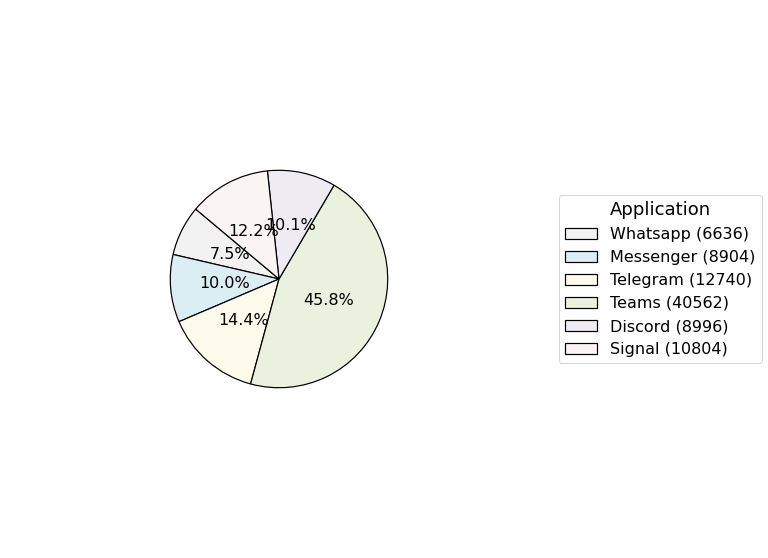

In [2]:
import matplotlib.pyplot as plt

# Data
applications = ["Whatsapp (6636)", "Messenger (8904)", "Telegram (12740)", "Teams (40562)", "Discord (8996)", "Signal (10804)"]
total_flows = [6636, 8904, 12740, 40562, 8996, 10804]
colors = ['#F2F2F2', '#DBEEF4', '#FFFBEC', '#EBF1DF', '#EEEBF2', '#FBF4F4']  # Updated colors

# Function for both values and percentages
def format_number(pct, allvals):
    total = sum(allvals)
    return f"{pct:.1f}%"

# Create pie chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax.pie(
    total_flows,
    labels=None,
    colors=colors,
    radius=0.5,
    startangle=140,
    autopct=lambda pct: format_number(pct, total_flows),
    pctdistance=0.5,
    textprops={'fontsize': 16, 'color': 'black', 'ha': 'center'},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.2}
)

# Legend outside with proper spacing
legend = ax.legend(applications, title="Application", loc="center left", bbox_to_anchor=(1, 0.5),
                   fontsize=16, title_fontsize=18)

# Save with perfect cropping
plt.savefig("final_pie_chart_clean.pdf", dpi=300,
            bbox_inches='tight', bbox_extra_artists=[legend], pad_inches=0)

plt.show()

# Offline vs Online

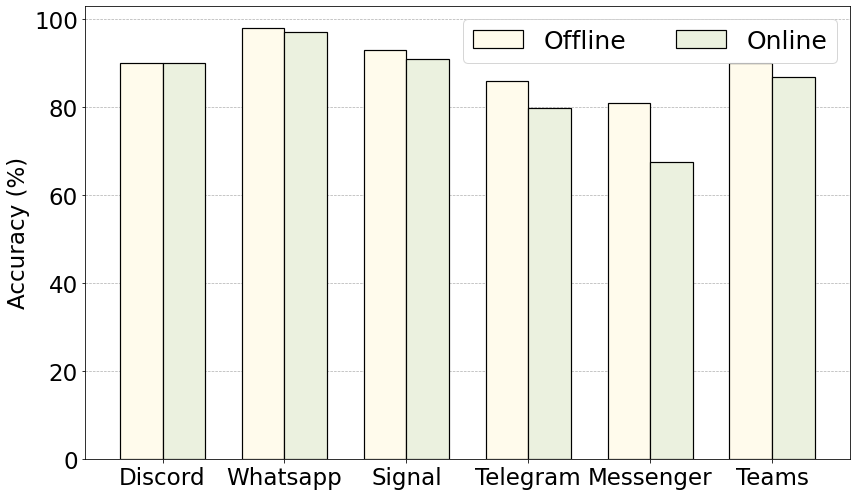

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Data
apps = ['Discord', 'Whatsapp', 'Signal', 'Telegram', 'Messenger', 'Teams']
offline = [90, 98, 93, 86, 81, 90]
online = [90.1, 97, 91, 79.8, 67.6, 86.9]

x = np.arange(len(apps))
width = 0.35

# Colors
light_green = '#EBF1DF'
light_blue = '#FFFBEC'

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.grid(True, axis='y', linestyle='--', linewidth=0.7)
ax.set_axisbelow(True)

bar1 = ax.bar(x - width/2, offline, width, label='Offline', color=light_blue,edgecolor='black', linewidth=1.2)
bar2 = ax.bar(x + width/2, online, width, label='Online', color=light_green,edgecolor='black', linewidth=1.2)

# Labels and title
ax.set_ylabel('Accuracy (%)', fontsize=23)
ax.set_xticks(x)
ax.set_xticklabels(apps, fontsize=23)
ax.tick_params(axis='y', labelsize=23)

# Legend: inside plot, top-right, horizontal
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=2, fontsize=25, frameon=True)
plt.tight_layout()
# Save BEFORE showing
plt.savefig("accuracy evaluation.pdf", format="pdf", bbox_inches="tight")
plt.show()



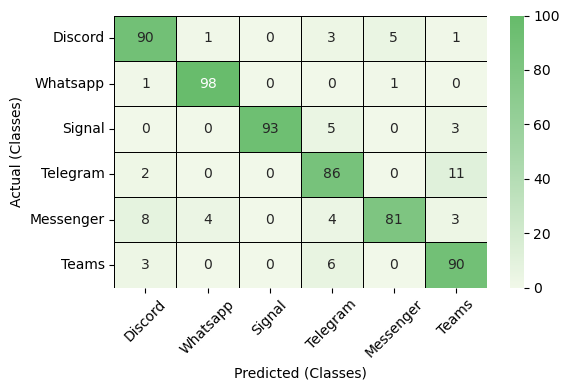

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Confusion matrix data
conf_matrix = np.array([
    [90, 1, 0, 3, 5, 1],
    [1, 98, 0, 0, 1, 0],
    [0, 0, 93, 5, 0, 3],
    [2, 0, 0, 86, 0, 11],
    [8, 4, 0, 4, 81, 3],
    [3, 0, 0, 6, 0, 90]
])

pale_green = LinearSegmentedColormap.from_list(
    'pale_green', ['#f1f8e9', '#a5d6a7', '#66bb6a']  # lightest to mid green
)


# Remove the first column for class "0" if unnecessary
# conf_matrix = conf_matrix[:, 1:]
# conf_matrix = conf_matrix[0:, :]  # if class 0 is not part of the actuals

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=pale_green, cbar=True,
            xticklabels=["Discord", "Whatsapp", "Signal", "Telegram", "Messenger", "Teams"],
            yticklabels=["Discord", "Whatsapp", "Signal", "Telegram", "Messenger", "Teams"],
            linewidths=0.5, linecolor='black', linestyle='-', vmin=0, vmax=100)  # Adding borders
plt.xlabel('Predicted (Classes)')
plt.ylabel('Actual (Classes)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()


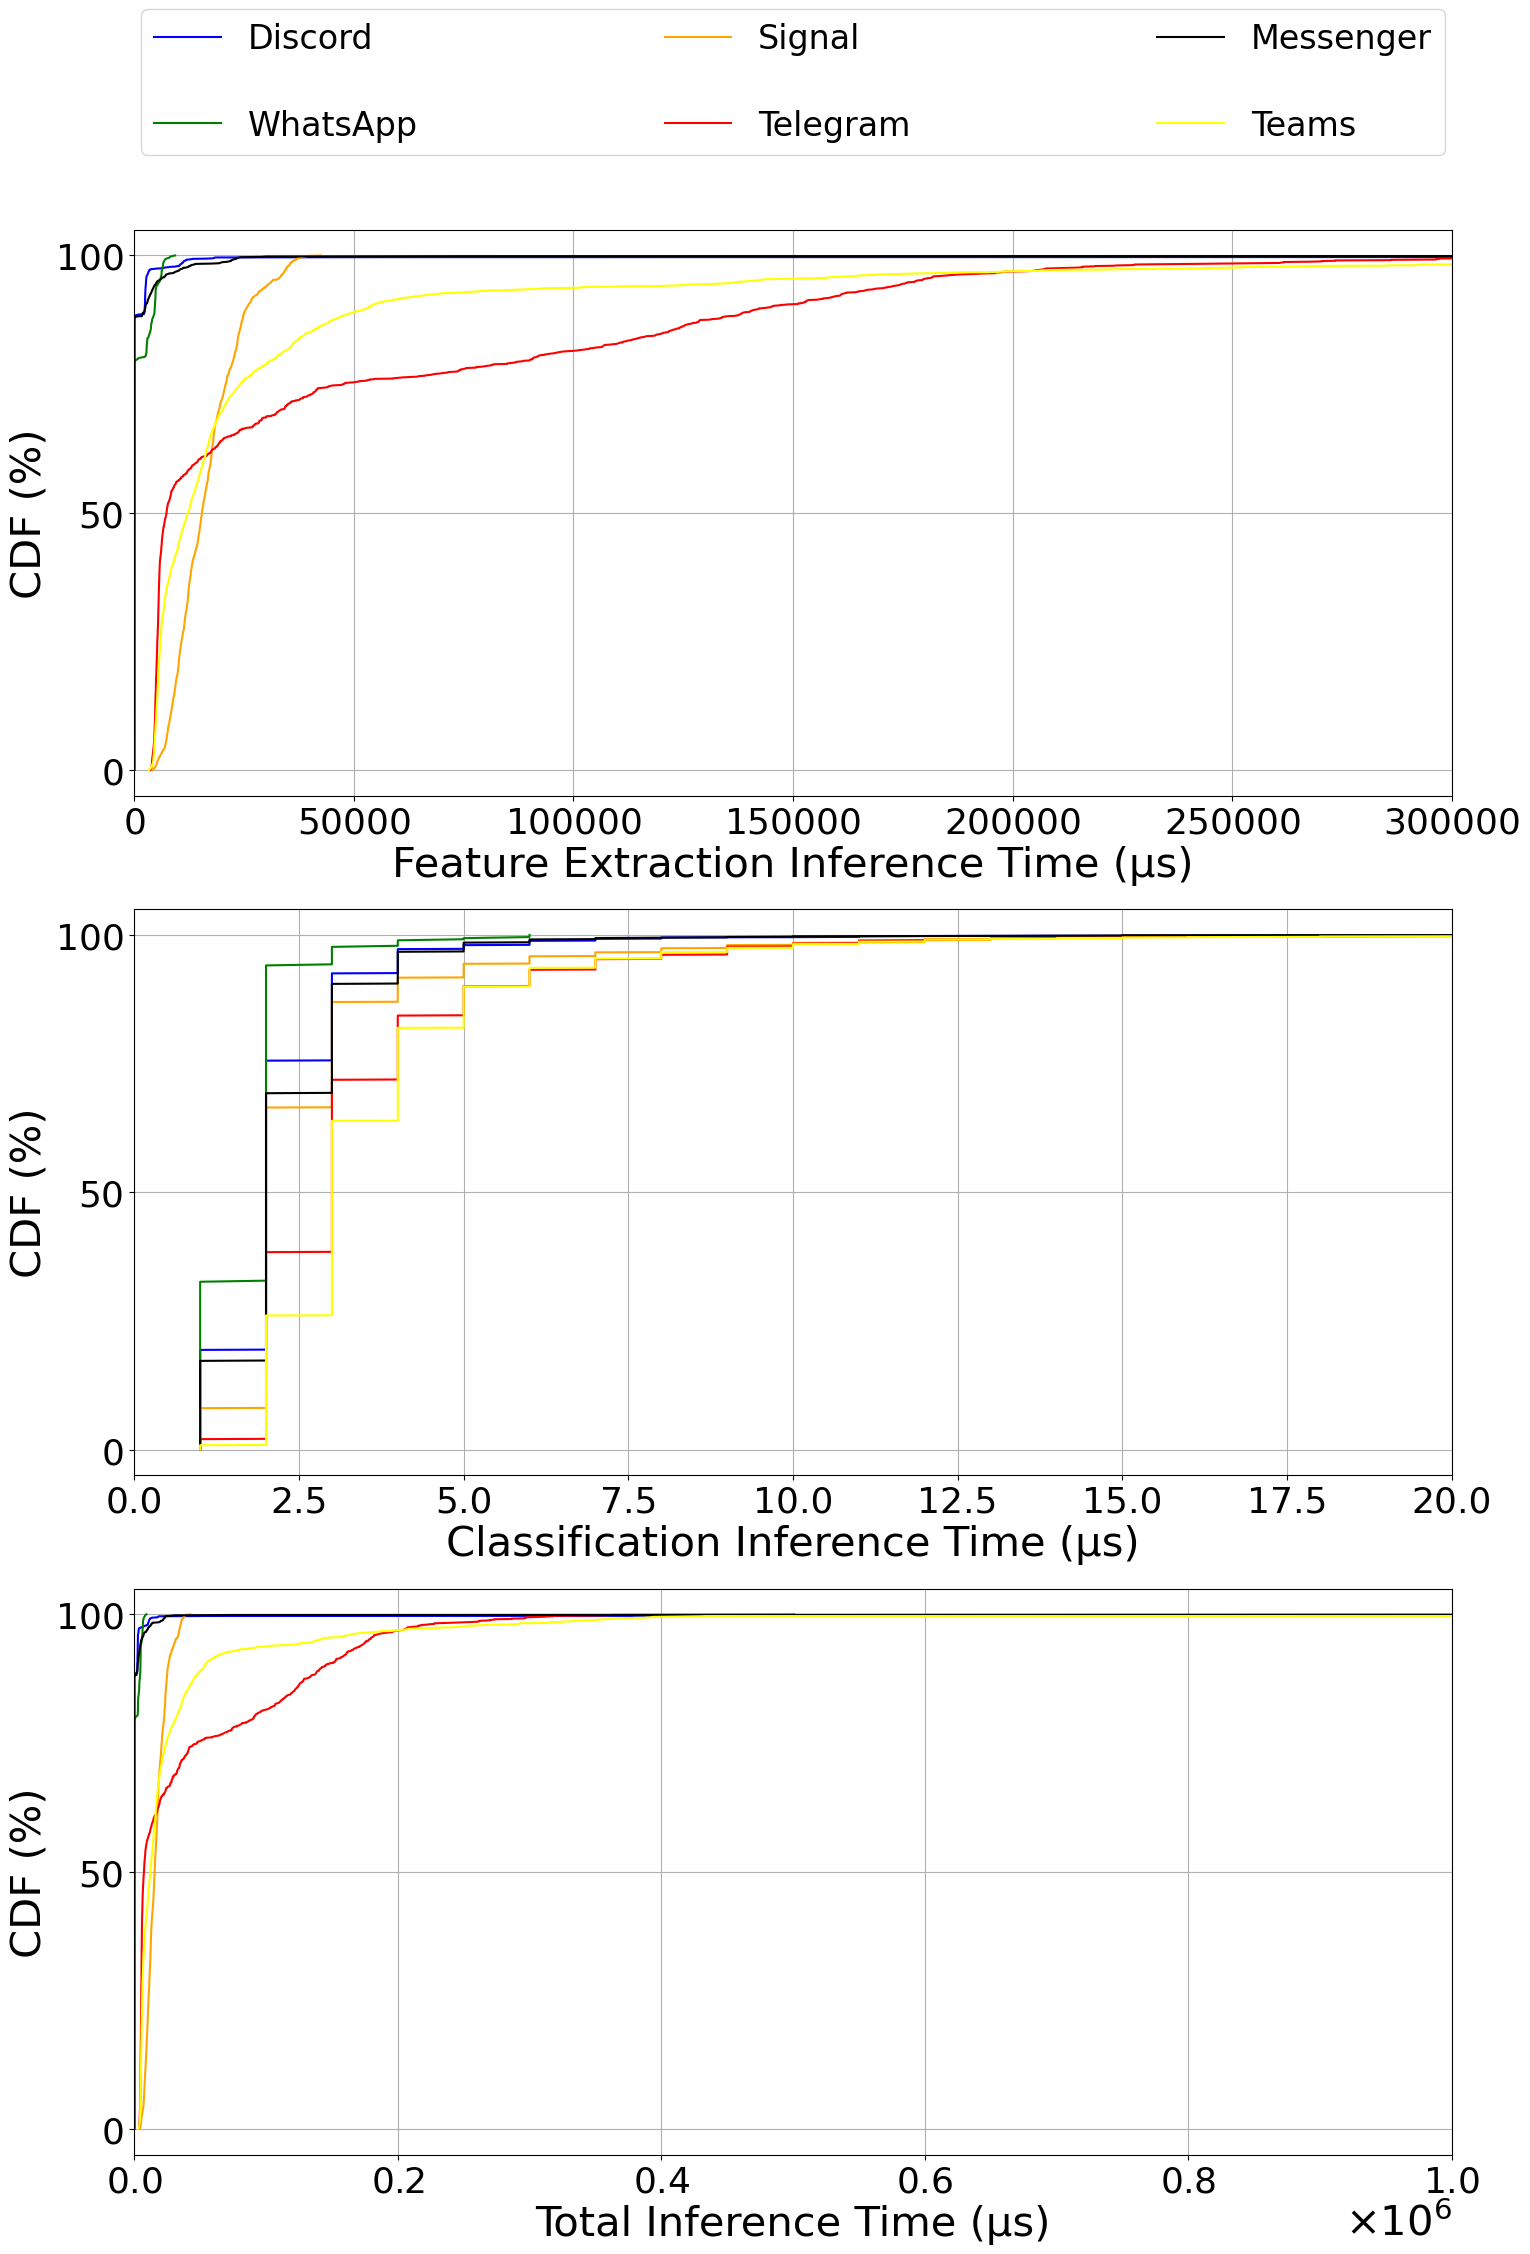

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.ticker as ticker
fig, axs = plt.subplots(3, 1, figsize=(17, 25), gridspec_kw={'hspace': 0.2})


mpl.rcParams['font.size'] = 30

# Reload the CSV file after reset
csv_file = "ts_f_apps.csv"
df = pd.read_csv(csv_file)

# Assume the CSV has exactly 2 columns
col1_name = df.columns[0]
col2_name = df.columns[1]
col3_name = df.columns[2]
col4_name = df.columns[3]
col5_name = df.columns[4]
col6_name = df.columns[5]

col1_label = "Discord"
col2_label = "WhatsApp"
col3_label = "Signal"
col4_label = "Telegram"
col5_label = "Messenger"
col6_label = "Teams"

# Extract and sort both columns
col1_sorted_f = np.sort(df[col1_name].dropna().astype(int))
col2_sorted_f = np.sort(df[col2_name].dropna().astype(int))
col3_sorted_f = np.sort(df[col3_name].dropna().astype(int))
col4_sorted_f = np.sort(df[col4_name].dropna().astype(int))
col5_sorted_f = np.sort(df[col5_name].dropna().astype(int))
col6_sorted_f = np.sort(df[col6_name].dropna().astype(int))

# Compute CDFs (in percentage)
cdf1_f = np.arange(1, len(col1_sorted_f) + 1) / len(col1_sorted_f) * 100
cdf2_f = np.arange(1, len(col2_sorted_f) + 1) / len(col2_sorted_f) * 100
cdf3_f = np.arange(1, len(col3_sorted_f) + 1) / len(col3_sorted_f) * 100
cdf4_f = np.arange(1, len(col4_sorted_f) + 1) / len(col4_sorted_f) * 100
cdf5_f = np.arange(1, len(col5_sorted_f) + 1) / len(col5_sorted_f) * 100
cdf6_f = np.arange(1, len(col6_sorted_f) + 1) / len(col6_sorted_f) * 100

# Plot both CDFs
axs[0].plot(col1_sorted_f, cdf1_f, label=col1_label, color='blue')
axs[0].plot(col2_sorted_f, cdf2_f, label=col2_label, color='green')
axs[0].plot(col3_sorted_f, cdf3_f, label=col3_label, color='orange')
axs[0].plot(col4_sorted_f, cdf4_f, label=col4_label, color='red')
axs[0].plot(col5_sorted_f, cdf5_f, label=col5_label, color='black')
axs[0].plot(col6_sorted_f, cdf6_f, label=col6_label, color='yellow')
axs[0].set_xlim(0, 0.03e7)
axs[0].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
#axs[0].ticklabel_format(style='sci', axis='x', scilimits=(6, 6))

axs[0].legend(
    loc='lower left',
    bbox_to_anchor=(0., 1.12, 1., 0.2),  # push higher
    ncol=3,
    mode="expand",
    borderaxespad=0.2,  # space between legend and axes
    fontsize=24,
    frameon=True,
    handlelength=2,
    labelspacing=1.6,
    columnspacing=2.5
)

# Reload the CSV file after reset
csv_file = "ts_c_apps.csv"
df = pd.read_csv(csv_file)

# Assume the CSV has exactly 2 columns
col1_name = df.columns[0]
col2_name = df.columns[1]
col3_name = df.columns[2]
col4_name = df.columns[3]
col5_name = df.columns[4]
col6_name = df.columns[5]

# Extract and sort both columns
col1_sorted_c = np.sort(df[col1_name].dropna().astype(int))
col2_sorted_c = np.sort(df[col2_name].dropna().astype(int))
col3_sorted_c = np.sort(df[col3_name].dropna().astype(int))
col4_sorted_c = np.sort(df[col4_name].dropna().astype(int))
col5_sorted_c = np.sort(df[col5_name].dropna().astype(int))
col6_sorted_c = np.sort(df[col6_name].dropna().astype(int))

# Compute CDFs (in percentage)
cdf1_c = np.arange(1, len(col1_sorted_c) + 1) / len(col1_sorted_c) * 100
cdf2_c = np.arange(1, len(col2_sorted_c) + 1) / len(col2_sorted_c) * 100
cdf3_c = np.arange(1, len(col3_sorted_c) + 1) / len(col3_sorted_c) * 100
cdf4_c = np.arange(1, len(col4_sorted_c) + 1) / len(col4_sorted_c) * 100
cdf5_c = np.arange(1, len(col5_sorted_c) + 1) / len(col5_sorted_c) * 100
cdf6_c = np.arange(1, len(col6_sorted_c) + 1) / len(col6_sorted_c) * 100

# Plot both CDFs
axs[1].plot(col1_sorted_c, cdf1_c, label=col1_label, color='blue')
axs[1].plot(col2_sorted_c, cdf2_c, label=col2_label, color='green')
axs[1].plot(col3_sorted_c, cdf3_c, label=col3_label, color='orange')
axs[1].plot(col4_sorted_c, cdf4_c, label=col4_label, color='red')
axs[1].plot(col5_sorted_c, cdf5_c, label=col5_label, color='black')
axs[1].plot(col6_sorted_c, cdf6_c, label=col6_label, color='yellow')
axs[1].set_xlim(0, 20)

# Reload the CSV file after reset
csv_file = "ts_t_apps.csv"
df = pd.read_csv(csv_file)

# Assume the CSV has exactly 2 columns
col1_name = df.columns[0]
col2_name = df.columns[1]
col3_name = df.columns[2]
col4_name = df.columns[3]
col5_name = df.columns[4]
col6_name = df.columns[5]

# Extract and sort both columns
col1_sorted_t = np.sort(df[col1_name].dropna().astype(int))
col2_sorted_t = np.sort(df[col2_name].dropna().astype(int))
col3_sorted_t = np.sort(df[col3_name].dropna().astype(int))
col4_sorted_t = np.sort(df[col4_name].dropna().astype(int))
col5_sorted_t = np.sort(df[col5_name].dropna().astype(int))
col6_sorted_t = np.sort(df[col6_name].dropna().astype(int))

# Compute CDFs (in percentage)
cdf1_t = np.arange(1, len(col1_sorted_t) + 1) / len(col1_sorted_t) * 100
cdf2_t = np.arange(1, len(col2_sorted_t) + 1) / len(col2_sorted_t) * 100
cdf3_t = np.arange(1, len(col3_sorted_t) + 1) / len(col3_sorted_t) * 100
cdf4_t = np.arange(1, len(col4_sorted_t) + 1) / len(col4_sorted_t) * 100
cdf5_t = np.arange(1, len(col5_sorted_t) + 1) / len(col5_sorted_t) * 100
cdf6_t = np.arange(1, len(col6_sorted_t) + 1) / len(col6_sorted_t) * 100

# Plot both CDFs
axs[2].plot(col1_sorted_t, cdf1_t, label=col1_label, color='blue')
axs[2].plot(col2_sorted_t, cdf2_t, label=col2_label, color='green')
axs[2].plot(col3_sorted_t, cdf3_t, label=col3_label, color='orange')
axs[2].plot(col4_sorted_t, cdf4_t, label=col4_label, color='red')
axs[2].plot(col5_sorted_t, cdf5_t, label=col5_label, color='black')
axs[2].plot(col6_sorted_t, cdf6_t, label=col6_label, color='yellow')
axs[2].set_xlim(0, 0.1e7)
axs[2].xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
axs[2].ticklabel_format(style='sci', axis='x', scilimits=(6, 6))

for ax in axs:
    ax.set_ylabel("CDF (%)", fontsize=30)
    # ax.legend(fontsize=24)
    ax.grid(True)
    ax.tick_params(axis='both', which='major', labelsize=26)
    ax.set_yticks([0, 50,  100])

axs[0].set_xlabel("Feature Extraction Inference Time (µs)", fontsize=30)
axs[1].set_xlabel("Classification Inference Time (µs)", fontsize=30)
axs[2].set_xlabel("Total Inference Time (µs)", fontsize=30)
# axs[0].set_title("CDF Comparison of Two Applications", fontsize=32)


# plt.xlabel("ts_c_diff")
# plt.ylabel("CDF (%)")
# plt.title("CDF Comparison of Two Applications")
# plt.legend()
# plt.grid(True)
for ax in axs:
    # ax.yaxis.get_offset_text().set_fontsize(30)
    ax.xaxis.get_offset_text().set_fontsize(30)

plt.subplots_adjust(hspace=0.9)  # Adjust this value to control vertical spacing
plt.savefig("inf_time_cdf.pdf")
plt.show()
